## Imports

In [250]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
import string
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Load and Explore Data

In [131]:
df=pd.read_csv('spam.csv',encoding='latin-1')[['v1','v2']]
df.columns=['label','message']

In [133]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [135]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [137]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [139]:
df['length']=df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Exploratory Data Analysis

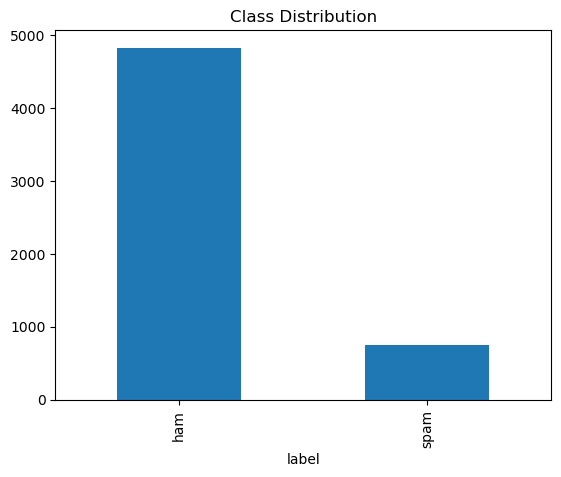

In [141]:
df['label'].value_counts().plot(kind='bar',title='Class Distribution')
plt.show()

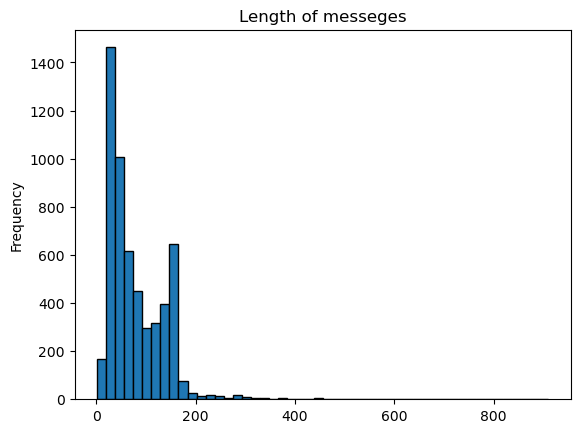

In [320]:
df['length'].plot(kind='hist',bins=50,lw=2,edgecolor='black',title='Length of messeges')
plt.show()

In [145]:
df.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

### Largest messege

In [157]:
df[df['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

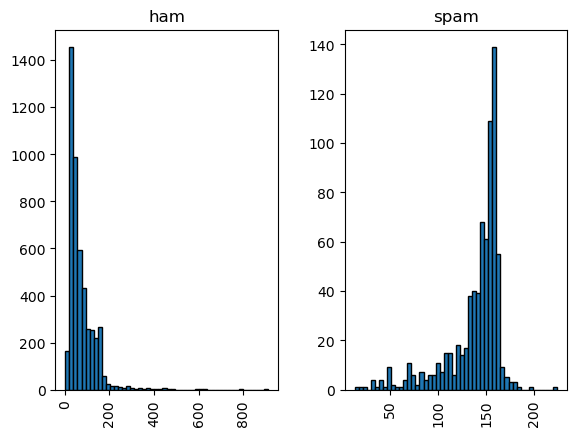

In [188]:
df.hist(column='length',by='label',bins=50,edgecolor='black')
plt.show()

## Text Pre-processing

In [324]:
def clean_mess(text):
    text=text.lower() ## lowercase
    text=re.sub(r'\d+','',text) ## remove numbers
    text=text.translate(str.maketrans('','',string.punctuation)) ## remove punctuations
    text=re.sub(r'\s+',' ',text) ## remove extra white space
    return text.strip()

In [198]:
df['cleaned_messege']=df['message'].apply(clean_mess)

In [200]:
df.head()

,label,message,length,cleaned_messege
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i dont think he goes to usf he lives aroun...


### Convert Labels

In [297]:
df['label_num']=df['label'].map({'ham':1,'spam':0})

In [299]:
df.head()

,label,message,length,cleaned_messege,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,1
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,0
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i dont think he goes to usf he lives aroun...,1


## Split Dataset

In [301]:
X=df['cleaned_messege']
y=df['label_num']

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Creating a Data Pipeline

In [305]:
pipeline=Pipeline([
    ('bow',CountVectorizer()),
    ('classifier',MultinomialNB()),
])

##  Train Model

In [307]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

In [309]:
predict=pipeline.predict(X_test)

##  Evaluate Model

In [311]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       208
           1       0.99      1.00      0.99      1464

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



In [313]:
print('Accuracy:', accuracy_score(y_test,predict))

Accuracy: 0.9874401913875598


In [315]:
print(confusion_matrix(y_test,predict))

[[ 192   16]
 [   5 1459]]
